In [2]:
import numpy 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
import matplotlib.patches as mpatches
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import scipy.stats as st 
import dtale 
import warnings
import random
from sklearn.model_selection import StratifiedKFold 
import plotly.express as px
from imblearn.over_sampling import RandomOverSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')
import pandas_profiling as pdp
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
from statsmodels.stats import weightstats as stests
import pandas_profiling as pp
from sklearn.preprocessing import StandardScaler

In [2]:
connect_mobile=pd.read_excel('Connect_Mobile__Attrition_Data_file.xlsx')
connect_mobile.head()

,active_cust,income,expenditure,months_on_network,Num_complaints,number_plan_changes,relocated,monthly_bill,technical_issues_per_month,Speed_test_result
0,0,1586,1268.8,85,4,1,0,121,4,85
1,0,1581,1264.8,85,4,1,0,133,4,85
2,0,1594,1275.2,82,4,1,0,118,4,85
3,0,1594,1275.2,82,4,1,0,123,4,85
4,1,1609,1287.2,80,4,1,0,177,4,85


In [4]:
df=connect_mobile.copy()

In [11]:
df.describe()

,active_cust,income,expenditure,months_on_network,Num_complaints,number_plan_changes,relocated,monthly_bill,technical_issues_per_month,Speed_test_result
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000
mean,0.578590,1855.279910,1409.669662,58.402450,4.012840,1.385410,0.123480,95.816450,3.31673,81.668540
std,0.493787,2712.385257,2174.330870,18.643736,0.285265,1.617101,0.328989,50.161327,1.24147,9.952554
min,0.000000,1130.000000,904.000000,-20.000000,3.000000,0.000000,0.000000,30.000000,1.00000,72.000000
25%,0.000000,1674.000000,1248.650000,47.000000,4.000000,0.000000,0.000000,45.000000,3.00000,78.000000
50%,1.000000,1805.000000,1358.400000,56.000000,4.000000,1.000000,0.000000,87.000000,4.00000,81.000000
75%,1.000000,1907.000000,1494.400000,70.000000,4.000000,2.000000,0.000000,133.000000,4.00000,85.000000
max,1.000000,229821.000000,183856.800000,449.000000,6.000000,9.000000,1.000000,181.000000,7.00000,332.000000


In [9]:
likely_cat={}
for var in df.columns:
    likely_cat[var] = 1*df[var].nunique()/df[var].count() < 0.05

In [10]:
likely_cat

{'active_cust': True,
 'income': True,
 'expenditure': True,
 'months_on_network': True,
 'Num_complaints': True,
 'number_plan_changes': True,
 'relocated': True,
 'monthly_bill': True,
 'technical_issues_per_month': True,
 'Speed_test_result': True}

In [23]:
def cat_to_to(df=None ,target='label',list_cate='list_of_cat_feature'):
    l1=[]
    for i in list_cate:
            df_t=pd.crosstab(df[target],df[i])
            stat, p, dof, expected = st.chi2_contingency(df_t,correction=True)
            deno=sum(df.sum())
            x=numpy.sqrt(stat / deno)
            if(x>0.25): #thresold
                 l1.append(i)
        return l1
        

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   active_cust                 100000 non-null  int64  
 1   income                      100000 non-null  int64  
 2   expenditure                 100000 non-null  float64
 3   months_on_network           100000 non-null  int64  
 4   Num_complaints              100000 non-null  int64  
 5   number_plan_changes         100000 non-null  int64  
 6   relocated                   100000 non-null  int64  
 7   monthly_bill                100000 non-null  int64  
 8   technical_issues_per_month  100000 non-null  int64  
 9   Speed_test_result           100000 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 7.6 MB


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(connect_mobile_remove_outlier.iloc[:,:-1])

In [ ]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2','pc3'])

In [ ]:
finalDf = pd.concat([principalDf, connect_mobile_remove_outlier['active_cust']] ,axis = 1) 

In [ ]:
px.scatter_3d(data_frame=finalDf,x='pc1',y='pc2',z='pc3',
              color='active_cust')

# Random Forest 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
clf = RandomForestClassifier(max_depth=6, min_samples_split=2)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print((classification_report(y_test, y_pred)))

In [ ]:
lst_accu_stratified = [] 
x=0
feature_common=pd.DataFrame()
skf = StratifiedKFold(n_splits=12, shuffle=True, random_state=1) 
for train_index, test_index in skf.split(X, y): 
    x_train_fold, x_test_fold = X.loc[train_index,:], X.loc[test_index,:] 
    y_train_fold, y_test_fold = y[train_index], y[test_index] 
    clf.fit(x_train_fold, y_train_fold)
#     feature_common[x]=feature_extract(clf,X_train.columns)
#     x+=1
    lst_accu_stratified.append(clf.score(x_test_fold, y_test_fold))
   
    
    
print('List of possible accuracy:', lst_accu_stratified) 
print('\nMaximum Accuracy That can be obtained from this model is:', 
      max(lst_accu_stratified)*100, '%') 
print('\nMinimum Accuracy:', 
      min(lst_accu_stratified)*100, '%') 
print('\nAverage Accuracy That can be obtained from this model is::',np.mean(lst_accu_stratified)) 
print('\n Median Accuracy That can be obtained from this model is::',np.median(lst_accu_stratified)) 
print('\nStandard Deviation is:',np.std(lst_accu_stratified))

In [ ]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
n_estimators = [int(x) for x in np.linspace(start = 5 , stop = 15, num = 10)]
max_features = ['auto', 'log2']

max_depth = [int(x) for x in np.linspace(5, 10, num = 2)] 

max_depth.append(None)

bootstrap = [True, False]

r_grid = {'n_estimators': n_estimators,

               'max_features': max_features,

               'max_depth': max_depth,

               'bootstrap': bootstrap}

print(r_grid)

In [ ]:
clf=RandomForestClassifier()

In [ ]:
grid_clf_f = GridSearchCV(estimator=clf, param_grid=r_grid,
                                scoring='f1', cv = 5, verbose=2, 
                                n_jobs=-1, return_train_score=True)

In [ ]:
grid_clf_f.fit(X_train, y_train)
print(grid_clf_f.best_params_)


## Recreate Model 

In [ ]:
params={'bootstrap': False, 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 15}

re_rfr=RandomForestClassifier(**params)

re_rfr.fit(X_train,y_train)

re_rfr.score(X_test,y_test)

In [ ]:
y_pred=re_rfr.predict(X_test)
y_pred

In [ ]:
print(confusion_matrix(y_test,y_pred))

In [ ]:
print((classification_report(y_test,y_pred)))

# SVM


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

# Accuracy of Support Vector Machine classifier
from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=1).fit(X_train, y_train)
svm.score(X_test, y_test)

In [ ]:
svm = SVC(kernel='linear', C=1).fit(X_train, y_train)
svm_predicted = svm.predict(X_test)
confusion = confusion_matrix(y_test, svm_predicted)


# compare algorithms

In [2]:
import pandas as pd
connect_mobile=pd.read_excel('Connect_Mobile__Attrition_Data_file.xlsx')
connect_mobile.head()

,active_cust,income,expenditure,months_on_network,Num_complaints,number_plan_changes,relocated,monthly_bill,technical_issues_per_month,Speed_test_result
0,0,1586,1268.8,85,4,1,0,121,4,85
1,0,1581,1264.8,85,4,1,0,133,4,85
2,0,1594,1275.2,82,4,1,0,118,4,85
3,0,1594,1275.2,82,4,1,0,123,4,85
4,1,1609,1287.2,80,4,1,0,177,4,85


In [3]:
df=connect_mobile.copy()

In [4]:
# dataframe = df[:,]
# array = dataframe.values
df=df.sample(frac=0.2)
X = df.iloc[:,1:]
Y = df.iloc[:,0]

In [20]:
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from scipy import stats
from sklearn.metrics import accuracy_score, average_precision_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression, SGDClassifier, PassiveAggressiveClassifier, Lasso
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold
from sklearn import preprocessing
from sklearn import tree
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, IsolationForest, VotingClassifier
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, Normalizer, PolynomialFeatures
from sklearn.decomposition import PCA, KernelPCA, FastICA, SparsePCA
from sklearn.pipeline import Pipeline
from sklearn.cluster import FeatureAgglomeration
from sklearn.kernel_approximation import RBFSampler
# from sklearn.preprocessing importabs
from sklearn.impute import SimpleImputer
import random

import warnings
import statsmodels.api as sm
warnings.filterwarnings('ignore')


In [25]:
# load dataset
model=[]
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models.append(('Random Forest', RandomForestClassifier()))
models.append(('Bernoulli', BernoulliNB()))
models.append(('AdaBoost', AdaBoostClassifier()))
models.append(('QDA', QuadraticDiscriminantAnalysis()))
models.append(('Gradient', GradientBoostingClassifier()))
models.append(('SGD', SGDClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))

# models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(
        model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison


Random Forest: 0.891600 (0.005472)
Bernoulli: 0.681200 (0.012143)
Random Forest: 0.891700 (0.006380)
Bernoulli: 0.681200 (0.012143)
AdaBoost: 0.837150 (0.008127)
QDA: 0.551650 (0.012702)
Gradient: 0.866100 (0.008273)
SGD: 0.556700 (0.066962)
LR: 0.691450 (0.023383)
LDA: 0.740550 (0.010690)
KNN: 0.724200 (0.011442)
CART: 0.849300 (0.008289)
NB: 0.487900 (0.028503)
Random Forest: 0.892550 (0.005336)
Bernoulli: 0.681200 (0.012143)
AdaBoost: 0.837150 (0.008127)
QDA: 0.551650 (0.012702)
Gradient: 0.866100 (0.008273)
SGD: 0.552250 (0.064505)
LR: 0.691450 (0.023383)
LDA: 0.740550 (0.010690)
KNN: 0.724200 (0.011442)
CART: 0.849750 (0.007454)
NB: 0.487900 (0.028503)


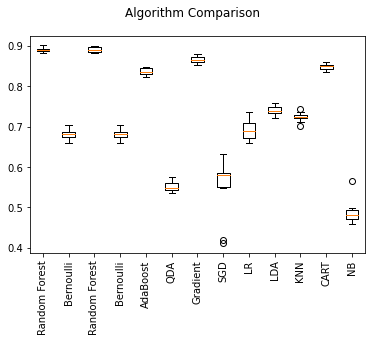

In [24]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.xticks(rotation=90)
plt.show()